## Caso práctico - Retail customer

#### ETL y Feature Engineering para la generación de insumos relevantes para la toma de decisiones.

#### Cliente/Área: Retail textil

Realizado por: Laura Saldarriaga Higuita

Lenguaje: Python

### 1. Construcción de ETL consumiendo todas las fuentes de información

#### Importación de librerías

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

#### Concatenación de archivos de Clientes Contactados (PDV_XX)
Se agrega una columna con el identificador del PDV (ID_PDV) del cual provienen los datos

In [ ]:
""" dataframes = []

directory_path = './CASO PRACTICO EXCEL'

for filename in os.listdir(directory_path):
    if filename.endswith('.xlsx') and filename.startswith('ClientesContactados_PDV_'):
        file_path = os.path.join(directory_path, filename)
        print(file_path)
        
        df = pd.read_excel(file_path)

    print(df.head())
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    print(file_name)
    
    pdv_number = file_name.split('_')[-1]

    df['ID_PDV'] = pdv_number
    print(df.head())
    dataframes.append(df)

    combined_data = pd.concat(dataframes, ignore_index=True)
    print(len(combined_data)) """

#### Exportar a nuevo archivo .csv
Nombre: ClientesContactados.csv

In [ ]:
#combined_data.to_csv('./NUEVOS DATOS/ClientesContactados.csv', index=False)

#### Importar archivo creado

In [ ]:
clientes_contactados = pd.read_csv('./NUEVOS DATOS/ClientesContactados.csv', index_col = False, low_memory=False)
clientes_contactados.head()

#### Leer archivo Movimientos.xlsx para identificar los campos

In [ ]:
movimientos = pd.read_excel('./CASO PRACTICO EXCEL/Movimientos.xlsx')
movimientos.head()

#### Unir los datasets de ClientesContactados y Movimientos a través del ID Cliente
Dataset resultante movs_clientes

In [ ]:
movs_clientes = pd.merge(movimientos, clientes_contactados, on=['ID CLIENTE'], how='left')
movs_clientes.head()

In [ ]:
movs_clientes.isnull().sum()

Descartar columna de ID_PDV_y, ya se tiene este dato proveniente de los archivos de ClientesContactados

In [ ]:
movs_clientes = movs_clientes.drop(['ID_PDV_y'], axis=1)
movs_clientes.head()

#### Leer archivo Referencias.xlsx para identificar los campos

In [ ]:
referencias = pd.read_excel('./CASO PRACTICO EXCEL/Referencias.xlsx')
referencias.head()

#### Unir los datasets de movs_clientes y Referencias a través del ID REFERENCIA
Dataset resultante movs_clientes_refs

In [ ]:
movs_clientes_refs = pd.merge(movs_clientes, referencias, on=['ID REFERENCIA'], how='left')
movs_clientes_refs.head()

#### Leer archivo Campaigns.xlsx (Campañas) para identificar los campos

In [ ]:
campaigns = pd.read_excel('./CASO PRACTICO EXCEL/Campaigns.xlsx')
campaigns.head()

#### Unir los datasets de movs_clientes_refs y Campaigns a través del CODIGO CAMPAÑA
Dataset resultante movs_clientes_refs_camp. Este set consume todas las fuentes de información, teniendo como base principal el archivo Movimientos.xlsx

In [ ]:
movs_clientes_refs_camp = pd.merge(movs_clientes_refs, campaigns, on=['CODIGO CAMPAÑA'], how='left')
movs_clientes_refs_camp.rename(columns={'ID_PDV_x':'ID_PDV'}, inplace=True)
movs_clientes_refs_camp.head()

#### Exportar data (raw) a nuevo archivo
Nombre: merged_data_retail.csv

In [ ]:
movs_clientes_refs_camp.to_csv('./NUEVOS DATOS/merged_data_retail.csv', index=False)

#### Importar archivo creado

In [2]:
merged_data_retail = pd.read_csv('./NUEVOS DATOS/merged_data_retail.csv', index_col = False, low_memory=False)
merged_data_retail.head()

,NUMERO FACTURA,ID CLIENTE,ID REFERENCIA,FECHA FACTURA,CIUDAD PDV,ID_PDV,UNIDADES,Ventas,FORMAS DE PAGO,EDAD,PROMOCION,CODIGO CAMPAÑA,TIPO CONTACTO,CATEGORIA,GRUPO,GENERO,Fecha Inicio,Fecha Fin,Hora Envio
0,FVE-1079,C8:YBME3`_AQ>D1H.35YR-,29411,2023-09-21 00:00:00,MEDELLIN,3,174,6472800.0,CONTADO POS,0,-,NaN,NaN,Termos,ACCESORIOS,UNISEX,NaN,NaN,NaN
1,FVE-754,"O'*FP,OV?Z2BN4=:ELP#I&",22584,2022-10-10 00:00:00,MEDELLIN,3,129,19595100.0,CREDITO 30 DIAS,0,-,NaN,NaN,Chaquetas,CHAQUETA,UNISEX,NaN,NaN,NaN
2,FVE-759,"O'*FP,OV?Z2BN4=:ELP#I&",22584,2022-10-18 00:00:00,MEDELLIN,3,129,18060001.0,CREDITO 30 DIAS,0,-,NaN,NaN,Chaquetas,CHAQUETA,UNISEX,NaN,NaN,NaN
3,FVE-769,"O'*FP,OV?Z2BN4=:ELP#I&",22584,2022-11-01 00:00:00,MEDELLIN,3,129,18060001.0,CREDITO 30 DIAS,0,-,NaN,NaN,Chaquetas,CHAQUETA,UNISEX,NaN,NaN,NaN
4,NFE-63,"O'*FP,OV?Z2BN4=:ELP#I&",22584,2022-11-01 00:00:00,MEDELLIN,1,129,-18060001.0,CREDITO 30 DIAS,0,-,NaN,NaN,Chaquetas,CHAQUETA,UNISEX,NaN,NaN,NaN


#### Proceso de limpieza de datos

##### Información del dataset

Ver tipos de datos, cantidad de datos

In [3]:
merged_data_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23843522 entries, 0 to 23843521
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   NUMERO FACTURA  object 
 1   ID CLIENTE      object 
 2   ID REFERENCIA   int64  
 3   FECHA FACTURA   object 
 4   CIUDAD PDV      object 
 5   ID_PDV          int64  
 6   UNIDADES        int64  
 7   Ventas          float64
 8   FORMAS DE PAGO  object 
 9   EDAD            int64  
 10  PROMOCION       object 
 11  CODIGO CAMPAÑA  object 
 12  TIPO CONTACTO   object 
 13  CATEGORIA       object 
 14  GRUPO           object 
 15  GENERO          object 
 16  Fecha Inicio    object 
 17  Fecha Fin       object 
 18  Hora Envio      float64
dtypes: float64(2), int64(4), object(13)
memory usage: 3.4+ GB


##### Descripción del dataset

Identificar mínimos y máximos

In [4]:
merged_data_retail.describe()

,ID REFERENCIA,ID_PDV,UNIDADES,Ventas,EDAD,Hora Envio
count,2.384352e+07,2.384352e+07,2.384352e+07,2.384352e+07,2.384352e+07,1.035072e+07
mean,1.597685e+04,8.276199e+01,9.450105e-01,1.262802e+05,1.458752e+01,1.181827e+01
std,8.604704e+03,4.925488e+01,4.791159e-01,1.377778e+05,2.118163e+01,2.052060e+00
min,1.900000e+01,1.000000e+00,-8.000000e+00,-1.959510e+07,0.000000e+00,9.000000e+00
25%,1.083500e+04,2.000000e+00,1.000000e+00,5.117700e+04,0.000000e+00,1.000000e+01
50%,1.889200e+04,1.110000e+02,1.000000e+00,1.062000e+05,0.000000e+00,1.200000e+01
75%,2.246800e+04,1.150000e+02,1.000000e+00,1.885000e+05,3.300000e+01,1.400000e+01
max,3.071900e+04,1.210000e+02,1.740000e+02,1.959510e+07,1.230000e+02,1.600000e+01


No debe haber unidades o ventas con valores negativos
(Consultar el martes)

In [5]:
numerical_columns = merged_data_retail.select_dtypes(include='number')

# Contar valores negativos
negative_counts = (numerical_columns < 0).sum()
print("Number of negative values in each numerical column:")
print(negative_counts)

Number of negative values in each numerical column:
ID REFERENCIA          0
ID_PDV                 0
UNIDADES          858139
Ventas           1065878
EDAD                   0
Hora Envio             0
dtype: int64


En total son 23M+ de entradas, se eliminarán las ventas y unidades con valores menores a 0


In [6]:
merged_data_retail = merged_data_retail[(merged_data_retail['Ventas'] >= 0)&(merged_data_retail['UNIDADES'] >= 0)]
print("Observaciones resultantes: ", len(merged_data_retail))

Observaciones resultantes:  22777644


##### Identificación de valores nulos

Identificar valores nulos, ordenar etiquetas en datos faltantes, imputar datos

In [7]:
merged_data_retail.isnull().sum()

NUMERO FACTURA           0
ID CLIENTE               0
ID REFERENCIA            0
FECHA FACTURA            0
CIUDAD PDV               0
ID_PDV                   0
UNIDADES                 0
Ventas                   0
FORMAS DE PAGO           0
EDAD                     0
PROMOCION          1147089
CODIGO CAMPAÑA      103737
TIPO CONTACTO       103737
CATEGORIA                0
GRUPO                    0
GENERO                   0
Fecha Inicio      12896917
Fecha Fin         12896917
Hora Envio        12896917
dtype: int64

Agregar etiqueta en nulos/vacíos:

En PROMOCION --> NO_PROMO

En TIPO CONTACTO --> OTRO

En CODIGO CAMPAÑA --> DESCONOCIDO

In [8]:
merged_data_retail.loc[merged_data_retail['PROMOCION'] == '-', 'PROMOCION'] = 'NO_PROMO'
merged_data_retail.loc[merged_data_retail['PROMOCION'].isna(), 'PROMOCION'] = 'NO_PROMO'
merged_data_retail.loc[merged_data_retail['TIPO CONTACTO'].isna(), 'TIPO CONTACTO'] = 'OTRO'
merged_data_retail.loc[merged_data_retail['CODIGO CAMPAÑA'].isna(), 'CODIGO CAMPAÑA'] = 'DESCONOCIDO'

merged_data_retail.head()

,NUMERO FACTURA,ID CLIENTE,ID REFERENCIA,FECHA FACTURA,CIUDAD PDV,ID_PDV,UNIDADES,Ventas,FORMAS DE PAGO,EDAD,PROMOCION,CODIGO CAMPAÑA,TIPO CONTACTO,CATEGORIA,GRUPO,GENERO,Fecha Inicio,Fecha Fin,Hora Envio
0,FVE-1079,C8:YBME3`_AQ>D1H.35YR-,29411,2023-09-21 00:00:00,MEDELLIN,3,174,6472800.0,CONTADO POS,0,NO_PROMO,DESCONOCIDO,OTRO,Termos,ACCESORIOS,UNISEX,NaN,NaN,NaN
1,FVE-754,"O'*FP,OV?Z2BN4=:ELP#I&",22584,2022-10-10 00:00:00,MEDELLIN,3,129,19595100.0,CREDITO 30 DIAS,0,NO_PROMO,DESCONOCIDO,OTRO,Chaquetas,CHAQUETA,UNISEX,NaN,NaN,NaN
2,FVE-759,"O'*FP,OV?Z2BN4=:ELP#I&",22584,2022-10-18 00:00:00,MEDELLIN,3,129,18060001.0,CREDITO 30 DIAS,0,NO_PROMO,DESCONOCIDO,OTRO,Chaquetas,CHAQUETA,UNISEX,NaN,NaN,NaN
3,FVE-769,"O'*FP,OV?Z2BN4=:ELP#I&",22584,2022-11-01 00:00:00,MEDELLIN,3,129,18060001.0,CREDITO 30 DIAS,0,NO_PROMO,DESCONOCIDO,OTRO,Chaquetas,CHAQUETA,UNISEX,NaN,NaN,NaN
6,FVE-754,"O'*FP,OV?Z2BN4=:ELP#I&",22581,2022-10-10 00:00:00,MEDELLIN,3,78,11848200.0,CREDITO 30 DIAS,0,NO_PROMO,DESCONOCIDO,OTRO,Chaquetas,CHAQUETA,UNISEX,NaN,NaN,NaN


Tratamiento de Edad

Observar outliers y distribución de los valores con un boxplot

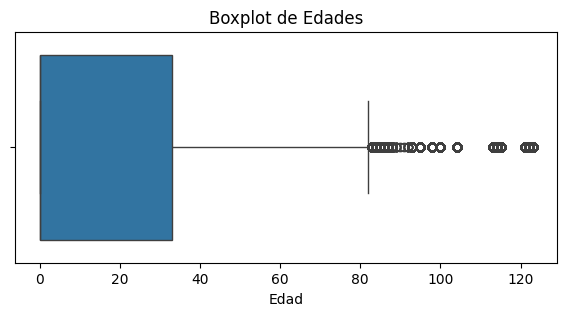

In [9]:
plt.figure(figsize=(7, 3))
sns.boxplot(x='EDAD', data=merged_data_retail)

# Ajusta las etiquetas y el título
plt.xlabel('Edad')
plt.title('Boxplot de Edades')

# Muestra el boxplot
plt.show()

Cantidad de registros en cero

In [10]:
zero_counts = (merged_data_retail["EDAD"] == 0).sum()
zero_counts
print("Porcentaje de registros con edad en cero: ", (zero_counts/len(merged_data_retail)*100),"%")

Porcentaje de registros con edad en cero:  61.241206509329935 %


Imputar con la media

In [11]:
mean_edad = round(merged_data_retail.loc[merged_data_retail['EDAD'] != 0, 'EDAD'].mean())
print("Media de edad:", mean_edad)

Media de edad: 38


In [12]:
merged_data_retail['EDAD'] = merged_data_retail['EDAD'].replace(0, mean_edad)
merged_data_retail.head()

,NUMERO FACTURA,ID CLIENTE,ID REFERENCIA,FECHA FACTURA,CIUDAD PDV,ID_PDV,UNIDADES,Ventas,FORMAS DE PAGO,EDAD,PROMOCION,CODIGO CAMPAÑA,TIPO CONTACTO,CATEGORIA,GRUPO,GENERO,Fecha Inicio,Fecha Fin,Hora Envio
0,FVE-1079,C8:YBME3`_AQ>D1H.35YR-,29411,2023-09-21 00:00:00,MEDELLIN,3,174,6472800.0,CONTADO POS,38,NO_PROMO,DESCONOCIDO,OTRO,Termos,ACCESORIOS,UNISEX,NaN,NaN,NaN
1,FVE-754,"O'*FP,OV?Z2BN4=:ELP#I&",22584,2022-10-10 00:00:00,MEDELLIN,3,129,19595100.0,CREDITO 30 DIAS,38,NO_PROMO,DESCONOCIDO,OTRO,Chaquetas,CHAQUETA,UNISEX,NaN,NaN,NaN
2,FVE-759,"O'*FP,OV?Z2BN4=:ELP#I&",22584,2022-10-18 00:00:00,MEDELLIN,3,129,18060001.0,CREDITO 30 DIAS,38,NO_PROMO,DESCONOCIDO,OTRO,Chaquetas,CHAQUETA,UNISEX,NaN,NaN,NaN
3,FVE-769,"O'*FP,OV?Z2BN4=:ELP#I&",22584,2022-11-01 00:00:00,MEDELLIN,3,129,18060001.0,CREDITO 30 DIAS,38,NO_PROMO,DESCONOCIDO,OTRO,Chaquetas,CHAQUETA,UNISEX,NaN,NaN,NaN
6,FVE-754,"O'*FP,OV?Z2BN4=:ELP#I&",22581,2022-10-10 00:00:00,MEDELLIN,3,78,11848200.0,CREDITO 30 DIAS,38,NO_PROMO,DESCONOCIDO,OTRO,Chaquetas,CHAQUETA,UNISEX,NaN,NaN,NaN


In [13]:
merged_data_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22777644 entries, 0 to 22784761
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   NUMERO FACTURA  object 
 1   ID CLIENTE      object 
 2   ID REFERENCIA   int64  
 3   FECHA FACTURA   object 
 4   CIUDAD PDV      object 
 5   ID_PDV          int64  
 6   UNIDADES        int64  
 7   Ventas          float64
 8   FORMAS DE PAGO  object 
 9   EDAD            int64  
 10  PROMOCION       object 
 11  CODIGO CAMPAÑA  object 
 12  TIPO CONTACTO   object 
 13  CATEGORIA       object 
 14  GRUPO           object 
 15  GENERO          object 
 16  Fecha Inicio    object 
 17  Fecha Fin       object 
 18  Hora Envio      float64
dtypes: float64(2), int64(4), object(13)
memory usage: 3.4+ GB


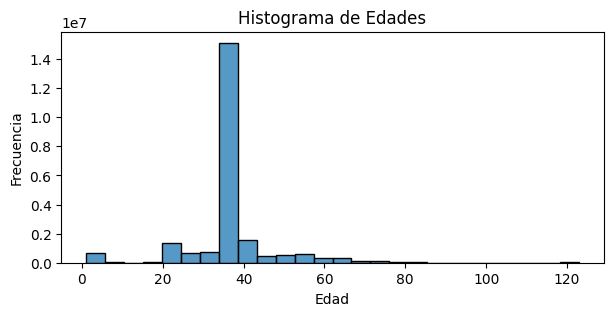

In [14]:
plt.figure(figsize=(7, 3))
sns.histplot(x='EDAD', data=merged_data_retail)

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')

plt.show()

Revisar los registros de edades mayores a 100 años

In [15]:
edad_mayor_a_100 = merged_data_retail[merged_data_retail['EDAD'] > 100]

# Cuenta la cantidad de registros
cantidad_registros = len(edad_mayor_a_100)

# Imprime el resultado
print(f'La cantidad de registros donde la edad es mayor a 100 es: {cantidad_registros}')

La cantidad de registros donde la edad es mayor a 100 es: 18187


In [16]:
print("Cantidad de IDs CLIENTE con edades mayores a 100: ", len(edad_mayor_a_100['ID CLIENTE'].unique()))

id_counts = edad_mayor_a_100['ID CLIENTE'].value_counts()
print("Ocurrencias por 'ID CLIENTE':")
print(id_counts)

Cantidad de IDs CLIENTE con edades mayores a 100:  23
Ocurrencias por 'ID CLIENTE':
ID CLIENTE
IB"_4/5/?L='Z?OUA&Z6U0    3195
G0):)DD9^]/%5?S80FFB?-    2261
OTFQ$4'@I3>%A'T=#.$`1%    2040
M&P5#[R<3O<BC)#!H63]F(    1704
A(8'BZ3TM'2RAG`=V:-><,    1485
O>U+F#B\:>"]R*]2=V-LA!    1350
KVT'11+K56HJA2"V;QC;U!     876
B!%46D[X'X]U5SG)X2P24*     795
C8?JW%JN-R$\;:R'D5*S]-     672
G9-?#M:F7U5/CA/K8\O_?0     560
OG7JYJ9-N[H"NLX/EGAM!.     536
PZ\K4%D=^HT-(:RA+OHC].     495
M;W6'*$FTQ;"/ZP-N,N\C!     444
H]/HX,'KB\_]1\4G_RQ<*/     302
O,#VF>!3%P:_8)Z/;*=('"     300
H2[^:;%HS57DK<VE!""EN)     276
KXJA[67\=^SH<42B\65>#"     266
KVJ>W/XEHM07]WGC'%EKZ/     216
M*;[A)2&\@A6CA=4:JXCS&     201
HU24NH6'SV&JHO;,A@9$!%     112
B-'Z_W1?V(MWMB?)DVT::#      83
A$D8QD+#Y\`2N$XQ.:8`3*      14
E15YQZU:2(#.$CT?%Q9`T$       4
Name: count, dtype: int64


Se imputan las edades mayores a 100 con la media de edad de los clientes

In [17]:
merged_data_retail.loc[merged_data_retail['EDAD'] > 100, 'EDAD'] = mean_edad

In [18]:
merged_data_retail.isnull().sum()

NUMERO FACTURA           0
ID CLIENTE               0
ID REFERENCIA            0
FECHA FACTURA            0
CIUDAD PDV               0
ID_PDV                   0
UNIDADES                 0
Ventas                   0
FORMAS DE PAGO           0
EDAD                     0
PROMOCION                0
CODIGO CAMPAÑA           0
TIPO CONTACTO            0
CATEGORIA                0
GRUPO                    0
GENERO                   0
Fecha Inicio      12896917
Fecha Fin         12896917
Hora Envio        12896917
dtype: int64

### 2. Creación de campos para segmentación

##### Días transcurridos entre el inicio de la campaña y la compra

Campo: Dias campaña compra

In [19]:
merged_data_new = merged_data_retail.copy()

In [20]:
merged_data_new.head()

,NUMERO FACTURA,ID CLIENTE,ID REFERENCIA,FECHA FACTURA,CIUDAD PDV,ID_PDV,UNIDADES,Ventas,FORMAS DE PAGO,EDAD,PROMOCION,CODIGO CAMPAÑA,TIPO CONTACTO,CATEGORIA,GRUPO,GENERO,Fecha Inicio,Fecha Fin,Hora Envio
0,FVE-1079,C8:YBME3`_AQ>D1H.35YR-,29411,2023-09-21 00:00:00,MEDELLIN,3,174,6472800.0,CONTADO POS,38,NO_PROMO,DESCONOCIDO,OTRO,Termos,ACCESORIOS,UNISEX,NaN,NaN,NaN
1,FVE-754,"O'*FP,OV?Z2BN4=:ELP#I&",22584,2022-10-10 00:00:00,MEDELLIN,3,129,19595100.0,CREDITO 30 DIAS,38,NO_PROMO,DESCONOCIDO,OTRO,Chaquetas,CHAQUETA,UNISEX,NaN,NaN,NaN
2,FVE-759,"O'*FP,OV?Z2BN4=:ELP#I&",22584,2022-10-18 00:00:00,MEDELLIN,3,129,18060001.0,CREDITO 30 DIAS,38,NO_PROMO,DESCONOCIDO,OTRO,Chaquetas,CHAQUETA,UNISEX,NaN,NaN,NaN
3,FVE-769,"O'*FP,OV?Z2BN4=:ELP#I&",22584,2022-11-01 00:00:00,MEDELLIN,3,129,18060001.0,CREDITO 30 DIAS,38,NO_PROMO,DESCONOCIDO,OTRO,Chaquetas,CHAQUETA,UNISEX,NaN,NaN,NaN
6,FVE-754,"O'*FP,OV?Z2BN4=:ELP#I&",22581,2022-10-10 00:00:00,MEDELLIN,3,78,11848200.0,CREDITO 30 DIAS,38,NO_PROMO,DESCONOCIDO,OTRO,Chaquetas,CHAQUETA,UNISEX,NaN,NaN,NaN


In [21]:
merged_data_new['FECHA FACTURA']=pd.to_datetime(merged_data_new['FECHA FACTURA'], errors='coerce')
merged_data_new['FECHA FACTURA'] = pd.to_datetime(merged_data_new['FECHA FACTURA']).dt.strftime('%Y-%m-%d')
merged_data_new['FECHA FACTURA']=pd.to_datetime(merged_data_new['FECHA FACTURA'], errors='coerce')
#merged_data_new['FECHA FACTURA'].head()

In [22]:
merged_data_new['Fecha Inicio'] = pd.to_datetime(merged_data_new['Fecha Inicio'])
merged_data_new['Fecha Fin'] = pd.to_datetime(merged_data_new['Fecha Fin'])

In [23]:
merged_data_new['Dias campaña compra'] = (merged_data_new['FECHA FACTURA']- merged_data_new['Fecha Inicio']).dt.days
merged_data_new.head()

,NUMERO FACTURA,ID CLIENTE,ID REFERENCIA,FECHA FACTURA,CIUDAD PDV,ID_PDV,UNIDADES,Ventas,FORMAS DE PAGO,EDAD,PROMOCION,CODIGO CAMPAÑA,TIPO CONTACTO,CATEGORIA,GRUPO,GENERO,Fecha Inicio,Fecha Fin,Hora Envio,Dias campaña compra
0,FVE-1079,C8:YBME3`_AQ>D1H.35YR-,29411,2023-09-21,MEDELLIN,3,174,6472800.0,CONTADO POS,38,NO_PROMO,DESCONOCIDO,OTRO,Termos,ACCESORIOS,UNISEX,NaT,NaT,NaN,NaN
1,FVE-754,"O'*FP,OV?Z2BN4=:ELP#I&",22584,2022-10-10,MEDELLIN,3,129,19595100.0,CREDITO 30 DIAS,38,NO_PROMO,DESCONOCIDO,OTRO,Chaquetas,CHAQUETA,UNISEX,NaT,NaT,NaN,NaN
2,FVE-759,"O'*FP,OV?Z2BN4=:ELP#I&",22584,2022-10-18,MEDELLIN,3,129,18060001.0,CREDITO 30 DIAS,38,NO_PROMO,DESCONOCIDO,OTRO,Chaquetas,CHAQUETA,UNISEX,NaT,NaT,NaN,NaN
3,FVE-769,"O'*FP,OV?Z2BN4=:ELP#I&",22584,2022-11-01,MEDELLIN,3,129,18060001.0,CREDITO 30 DIAS,38,NO_PROMO,DESCONOCIDO,OTRO,Chaquetas,CHAQUETA,UNISEX,NaT,NaT,NaN,NaN
6,FVE-754,"O'*FP,OV?Z2BN4=:ELP#I&",22581,2022-10-10,MEDELLIN,3,78,11848200.0,CREDITO 30 DIAS,38,NO_PROMO,DESCONOCIDO,OTRO,Chaquetas,CHAQUETA,UNISEX,NaT,NaT,NaN,NaN


In [24]:
merged_data_new.sort_values(by=['ID CLIENTE', 'FECHA FACTURA'], inplace=True)
merged_data_new = merged_data_new.reset_index(drop=True)
merged_data_new.head()

,NUMERO FACTURA,ID CLIENTE,ID REFERENCIA,FECHA FACTURA,CIUDAD PDV,ID_PDV,UNIDADES,Ventas,FORMAS DE PAGO,EDAD,PROMOCION,CODIGO CAMPAÑA,TIPO CONTACTO,CATEGORIA,GRUPO,GENERO,Fecha Inicio,Fecha Fin,Hora Envio,Dias campaña compra
0,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,227B,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-01-18,2023-01-22,14.0,-13.0
1,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,232B,SMS,Chaquetas,CHAQUETA,MUJER,2023-01-25,2023-01-27,10.0,-20.0
2,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,236B,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-01-31,2023-02-03,10.0,-26.0
3,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,341A,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-05-24,2023-05-26,12.0,-139.0
4,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,227B,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-01-18,2023-01-22,14.0,-13.0


##### Revisar registros duplicados

In [25]:
merged_data_new = merged_data_new.drop_duplicates()
merged_data_new = merged_data_new.reset_index(drop=True)
merged_data_new.head()

,NUMERO FACTURA,ID CLIENTE,ID REFERENCIA,FECHA FACTURA,CIUDAD PDV,ID_PDV,UNIDADES,Ventas,FORMAS DE PAGO,EDAD,PROMOCION,CODIGO CAMPAÑA,TIPO CONTACTO,CATEGORIA,GRUPO,GENERO,Fecha Inicio,Fecha Fin,Hora Envio,Dias campaña compra
0,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,227B,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-01-18,2023-01-22,14.0,-13.0
1,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,232B,SMS,Chaquetas,CHAQUETA,MUJER,2023-01-25,2023-01-27,10.0,-20.0
2,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,236B,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-01-31,2023-02-03,10.0,-26.0
3,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,341A,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-05-24,2023-05-26,12.0,-139.0
4,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,300,EMAIL,Chaquetas,CHAQUETA,MUJER,NaT,NaT,NaN,NaN


In [26]:
merged_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4875797 entries, 0 to 4875796
Data columns (total 20 columns):
 #   Column               Dtype         
---  ------               -----         
 0   NUMERO FACTURA       object        
 1   ID CLIENTE           object        
 2   ID REFERENCIA        int64         
 3   FECHA FACTURA        datetime64[ns]
 4   CIUDAD PDV           object        
 5   ID_PDV               int64         
 6   UNIDADES             int64         
 7   Ventas               float64       
 8   FORMAS DE PAGO       object        
 9   EDAD                 int64         
 10  PROMOCION            object        
 11  CODIGO CAMPAÑA       object        
 12  TIPO CONTACTO        object        
 13  CATEGORIA            object        
 14  GRUPO                object        
 15  GENERO               object        
 16  Fecha Inicio         datetime64[ns]
 17  Fecha Fin            datetime64[ns]
 18  Hora Envio           float64       
 19  Dias campaña compra  

##### Tratamiento fechas faltantes

Se agrega una fecha por defecto a las fechas faltantes (2000-01-01)

Se agrega una hora de envío por defecto a las horas faltantes (0.0)

In [27]:
default_date = pd.to_datetime('2000-01-01')
default_hora = 0
merged_data_new['FECHA FACTURA'] = merged_data_new['FECHA FACTURA'].fillna(default_date)
merged_data_new['Fecha Inicio'] = merged_data_new['Fecha Inicio'].fillna(default_date)
merged_data_new['Fecha Fin'] = merged_data_new['Fecha Fin'].fillna(default_date)
merged_data_new['Hora Envio'] = merged_data_new['Hora Envio'].fillna(default_hora)
merged_data_new.head()

,NUMERO FACTURA,ID CLIENTE,ID REFERENCIA,FECHA FACTURA,CIUDAD PDV,ID_PDV,UNIDADES,Ventas,FORMAS DE PAGO,EDAD,PROMOCION,CODIGO CAMPAÑA,TIPO CONTACTO,CATEGORIA,GRUPO,GENERO,Fecha Inicio,Fecha Fin,Hora Envio,Dias campaña compra
0,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,227B,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-01-18,2023-01-22,14.0,-13.0
1,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,232B,SMS,Chaquetas,CHAQUETA,MUJER,2023-01-25,2023-01-27,10.0,-20.0
2,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,236B,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-01-31,2023-02-03,10.0,-26.0
3,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,341A,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-05-24,2023-05-26,12.0,-139.0
4,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,300,EMAIL,Chaquetas,CHAQUETA,MUJER,2000-01-01,2000-01-01,0.0,NaN


##### Precio promedio de la unidad

In [28]:
merged_data_new['Precio promedio unidad'] = merged_data_new['Ventas']/merged_data_new['UNIDADES']
merged_data_new.head()

,NUMERO FACTURA,ID CLIENTE,ID REFERENCIA,FECHA FACTURA,CIUDAD PDV,ID_PDV,UNIDADES,Ventas,FORMAS DE PAGO,EDAD,...,CODIGO CAMPAÑA,TIPO CONTACTO,CATEGORIA,GRUPO,GENERO,Fecha Inicio,Fecha Fin,Hora Envio,Dias campaña compra,Precio promedio unidad
0,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,227B,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-01-18,2023-01-22,14.0,-13.0,350000.0
1,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,232B,SMS,Chaquetas,CHAQUETA,MUJER,2023-01-25,2023-01-27,10.0,-20.0,350000.0
2,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,236B,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-01-31,2023-02-03,10.0,-26.0,350000.0
3,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,341A,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-05-24,2023-05-26,12.0,-139.0,350000.0
4,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,300,EMAIL,Chaquetas,CHAQUETA,MUJER,2000-01-01,2000-01-01,0.0,NaN,350000.0


##### Día de la semana en la que se cerró la compra (asumiendo que es la fecha de la factura)

In [29]:
merged_data_new['FECHA FACTURA'] = pd.to_datetime(merged_data_new['FECHA FACTURA'], errors='coerce')
merged_data_new.head()

,NUMERO FACTURA,ID CLIENTE,ID REFERENCIA,FECHA FACTURA,CIUDAD PDV,ID_PDV,UNIDADES,Ventas,FORMAS DE PAGO,EDAD,...,CODIGO CAMPAÑA,TIPO CONTACTO,CATEGORIA,GRUPO,GENERO,Fecha Inicio,Fecha Fin,Hora Envio,Dias campaña compra,Precio promedio unidad
0,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,227B,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-01-18,2023-01-22,14.0,-13.0,350000.0
1,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,232B,SMS,Chaquetas,CHAQUETA,MUJER,2023-01-25,2023-01-27,10.0,-20.0,350000.0
2,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,236B,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-01-31,2023-02-03,10.0,-26.0,350000.0
3,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,341A,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-05-24,2023-05-26,12.0,-139.0,350000.0
4,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,300,EMAIL,Chaquetas,CHAQUETA,MUJER,2000-01-01,2000-01-01,0.0,NaN,350000.0


In [30]:
merged_data_new['Dia compra'] = merged_data_new['FECHA FACTURA'].dt.day_name()
merged_data_new['Dia compra'].fillna("Dia desconocido", inplace= True)

ingles_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}


merged_data_new['Dia compra'] = merged_data_new['Dia compra'].replace(ingles_espanol)
merged_data_new.head()

,NUMERO FACTURA,ID CLIENTE,ID REFERENCIA,FECHA FACTURA,CIUDAD PDV,ID_PDV,UNIDADES,Ventas,FORMAS DE PAGO,EDAD,...,TIPO CONTACTO,CATEGORIA,GRUPO,GENERO,Fecha Inicio,Fecha Fin,Hora Envio,Dias campaña compra,Precio promedio unidad,Dia compra
0,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-01-18,2023-01-22,14.0,-13.0,350000.0,Jueves
1,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,SMS,Chaquetas,CHAQUETA,MUJER,2023-01-25,2023-01-27,10.0,-20.0,350000.0,Jueves
2,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-01-31,2023-02-03,10.0,-26.0,350000.0,Jueves
3,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-05-24,2023-05-26,12.0,-139.0,350000.0,Jueves
4,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,EMAIL,Chaquetas,CHAQUETA,MUJER,2000-01-01,2000-01-01,0.0,NaN,350000.0,Jueves


In [31]:
merged_data_new.loc[merged_data_new['Dias campaña compra'].isna(), 'Dias campaña compra'] = 'No info'
merged_data_new.head()

/var/folders/4z/_zp620rd3w915xf6z_j1jql80000gn/T/ipykernel_2510/864336907.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No info' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_data_new.loc[merged_data_new['Dias campaña compra'].isna(), 'Dias campaña compra'] = 'No info'


,NUMERO FACTURA,ID CLIENTE,ID REFERENCIA,FECHA FACTURA,CIUDAD PDV,ID_PDV,UNIDADES,Ventas,FORMAS DE PAGO,EDAD,...,TIPO CONTACTO,CATEGORIA,GRUPO,GENERO,Fecha Inicio,Fecha Fin,Hora Envio,Dias campaña compra,Precio promedio unidad,Dia compra
0,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-01-18,2023-01-22,14.0,-13.0,350000.0,Jueves
1,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,SMS,Chaquetas,CHAQUETA,MUJER,2023-01-25,2023-01-27,10.0,-20.0,350000.0,Jueves
2,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-01-31,2023-02-03,10.0,-26.0,350000.0,Jueves
3,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,EMAIL,Chaquetas,CHAQUETA,MUJER,2023-05-24,2023-05-26,12.0,-139.0,350000.0,Jueves
4,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,EMAIL,Chaquetas,CHAQUETA,MUJER,2000-01-01,2000-01-01,0.0,No info,350000.0,Jueves


##### Guardar datos con tratamiento y campos añadidos

In [32]:
merged_data_new.to_csv('./NUEVOS DATOS/enriched_data_retail.csv', index=False)

Guardar dataset para cantidad de movimientos y cantidad de ventas

In [33]:
merged_data_simplified = merged_data_new[['NUMERO FACTURA', 'TIPO CONTACTO']]
merged_data_simplified.head()

,NUMERO FACTURA,TIPO CONTACTO
0,PFV-110580,EMAIL
1,PFV-110580,SMS
2,PFV-110580,EMAIL
3,PFV-110580,EMAIL
4,PFV-110580,EMAIL


In [34]:
merged_data_simplified.to_csv('./NUEVOS DATOS/enriched_data_simp.csv', index=False)

##### Información sobre campañas

¿Qué porcentaje de los movimientos de cada campaña (de acuerdo a las facturas) fueron hechas en el rango de duración de la campaña?

In [35]:
merged_data_new['En campaña'] = ((merged_data_new['FECHA FACTURA'] >= merged_data_new['Fecha Inicio']) & 
                                    (merged_data_new['FECHA FACTURA'] <= merged_data_new['Fecha Fin'])).astype(int)
merged_data_new.head()

,NUMERO FACTURA,ID CLIENTE,ID REFERENCIA,FECHA FACTURA,CIUDAD PDV,ID_PDV,UNIDADES,Ventas,FORMAS DE PAGO,EDAD,...,CATEGORIA,GRUPO,GENERO,Fecha Inicio,Fecha Fin,Hora Envio,Dias campaña compra,Precio promedio unidad,Dia compra,En campaña
0,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,Chaquetas,CHAQUETA,MUJER,2023-01-18,2023-01-22,14.0,-13.0,350000.0,Jueves,0
1,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,Chaquetas,CHAQUETA,MUJER,2023-01-25,2023-01-27,10.0,-20.0,350000.0,Jueves,0
2,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,Chaquetas,CHAQUETA,MUJER,2023-01-31,2023-02-03,10.0,-26.0,350000.0,Jueves,0
3,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,Chaquetas,CHAQUETA,MUJER,2023-05-24,2023-05-26,12.0,-139.0,350000.0,Jueves,0
4,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,Chaquetas,CHAQUETA,MUJER,2000-01-01,2000-01-01,0.0,No info,350000.0,Jueves,0


In [36]:
camp_data = merged_data_new[['CODIGO CAMPAÑA', 'En campaña']]

camp_counts = camp_data['CODIGO CAMPAÑA'].value_counts().reset_index()
camp_counts.columns = ['CODIGO CAMPAÑA', 'Total Apariciones']

camp_1_counts = camp_data[camp_data['En campaña'] == 1]['CODIGO CAMPAÑA'].value_counts().reset_index()
camp_1_counts.columns = ['CODIGO CAMPAÑA', 'Si campaña']

camp_0_counts = camp_data[camp_data['En campaña'] == 0]['CODIGO CAMPAÑA'].value_counts().reset_index()
camp_0_counts.columns = ['CODIGO CAMPAÑA', 'No campaña']

In [37]:
result_data = pd.merge(camp_counts, camp_1_counts, on='CODIGO CAMPAÑA', how='left')
result_data = pd.merge(result_data, camp_0_counts, on='CODIGO CAMPAÑA', how='left')
result_data.head()

,CODIGO CAMPAÑA,Total Apariciones,Si campaña,No campaña
0,455,117251,10304,106947
1,98,116846,3308,113538
2,DESCONOCIDO,103737,1221,102516
3,440,99484,8838,90646
4,453,98465,7877,90588


In [38]:
result_data = result_data.fillna(0)

# Agregar la columna de porcentaje
result_data['Porcentaje si campaña'] = (result_data['Si campaña'] / result_data['Total Apariciones']) * 100
result_data.head()

,CODIGO CAMPAÑA,Total Apariciones,Si campaña,No campaña,Porcentaje si campaña
0,455,117251,10304,106947,8.787985
1,98,116846,3308,113538,2.831077
2,DESCONOCIDO,103737,1221,102516,1.177015
3,440,99484,8838,90646,8.883841
4,453,98465,7877,90588,7.999797


In [39]:
result_data = result_data.sort_values(by='Porcentaje si campaña', ascending=False)
result_data.head()

,CODIGO CAMPAÑA,Total Apariciones,Si campaña,No campaña,Porcentaje si campaña
24,450,67068,11686,55382,17.424107
103,427,9391,1281,8110,13.640720
123,55,5874,674,5200,11.474293
136,69,4145,455,3690,10.977081
94,438,13295,1451,11844,10.913877


In [40]:
result_data.to_csv('./NUEVOS DATOS/datos_campañas.csv', index=False)

##### Datos para reporte

Para que quede información sobre las ventas concretadas, sin código de campaña, tipo de contacto, fechas

In [41]:
merged_data_nc = merged_data_new.copy()
merged_data_nc.drop(columns={'TIPO CONTACTO', 'CODIGO CAMPAÑA', 'Fecha Inicio', 'Fecha Fin', 'Hora Envio', 'Dias campaña compra'}, inplace=True)
merged_data_nc.head()

,NUMERO FACTURA,ID CLIENTE,ID REFERENCIA,FECHA FACTURA,CIUDAD PDV,ID_PDV,UNIDADES,Ventas,FORMAS DE PAGO,EDAD,PROMOCION,CATEGORIA,GRUPO,GENERO,Precio promedio unidad,Dia compra,En campaña
0,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,Chaquetas,CHAQUETA,MUJER,350000.0,Jueves,0
1,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,Chaquetas,CHAQUETA,MUJER,350000.0,Jueves,0
2,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,Chaquetas,CHAQUETA,MUJER,350000.0,Jueves,0
3,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,Chaquetas,CHAQUETA,MUJER,350000.0,Jueves,0
4,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,Chaquetas,CHAQUETA,MUJER,350000.0,Jueves,0


In [42]:
merged_data_nc = merged_data_nc.drop_duplicates()
merged_data_nc = merged_data_nc.reset_index(drop=True)
merged_data_nc.head()

,NUMERO FACTURA,ID CLIENTE,ID REFERENCIA,FECHA FACTURA,CIUDAD PDV,ID_PDV,UNIDADES,Ventas,FORMAS DE PAGO,EDAD,PROMOCION,CATEGORIA,GRUPO,GENERO,Precio promedio unidad,Dia compra,En campaña
0,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,DESCUENTO MANUAL CON TOPE,Chaquetas,CHAQUETA,MUJER,350000.0,Jueves,0
1,PFV-27977,A!!0+>5_!PQB&$X()/YHR-,20162,2022-08-06,BOGOTÁ,114,1,327000.0,CONTADO POS,43,NO_PROMO,Chaquetas,CHAQUETA,MUJER,327000.0,Sábado,0
2,PFV-27977,A!!0+>5_!PQB&$X()/YHR-,11300,2022-08-06,BOGOTÁ,114,1,88900.0,CONTADO POS,43,DESCUENTO MANUAL CON TOPE,Gorros,GORRO,UNISEX,88900.0,Sábado,0
3,PFV-76016,"A!#)_ZVDPA;]W*\,W<?3=(",22556,2022-10-20,BOGOTÁ,112,1,230800.0,CONTADO POS,1,DESCUENTO MANUAL CON TOPE,Chaquetas,CHAQUETA,UNISEX,230800.0,Jueves,0
4,PFV-76016,"A!#)_ZVDPA;]W*\,W<?3=(",23821,2022-10-20,BOGOTÁ,112,1,85600.0,CONTADO POS,1,HALLOW HEAT,Gorros,GORRO,UNISEX,85600.0,Jueves,0


In [43]:
merged_data_nc.to_csv('./NUEVOS DATOS/data_retail_nodates.csv', index=False)

Días transcurridos entre compra por cliente

In [44]:
merged_data_new_grouped = merged_data_new.groupby('NUMERO FACTURA').agg({
    'ID CLIENTE':'first',
    'FECHA FACTURA':'first',
    'CIUDAD PDV': 'first'
})

In [45]:
merged_data_new_grouped = merged_data_new_grouped.sort_values(by=['ID CLIENTE', 'FECHA FACTURA'])
merged_data_new_grouped.head()

,ID CLIENTE,FECHA FACTURA,CIUDAD PDV
NUMERO FACTURA,,,
PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",2023-01-05,BOGOTÁ
PFV-27977,A!!0+>5_!PQB&$X()/YHR-,2022-08-06,BOGOTÁ
PFV-76016,"A!#)_ZVDPA;]W*\,W<?3=(",2022-10-20,BOGOTÁ
FEW-17894,"A!#2*2'.L&E""2XN8.5=ST.",2022-11-22,ONLINE
FEW-18423,"A!#2*2'.L&E""2XN8.5=ST.",2022-11-25,ONLINE


In [46]:
merged_data_new_grouped['dias_ultima_compra'] = merged_data_new_grouped.groupby('ID CLIENTE')['FECHA FACTURA'].diff().dt.days
merged_data_new_grouped=merged_data_new_grouped.sort_values(by=['ID CLIENTE', 'FECHA FACTURA'])

In [47]:
merged_data_new_grouped['dias_ultima_compra']=merged_data_new_grouped['dias_ultima_compra'].fillna('9999')
merged_data_new_grouped.head(10)

,ID CLIENTE,FECHA FACTURA,CIUDAD PDV,dias_ultima_compra
NUMERO FACTURA,,,,
PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",2023-01-05,BOGOTÁ,9999
PFV-27977,A!!0+>5_!PQB&$X()/YHR-,2022-08-06,BOGOTÁ,9999
PFV-76016,"A!#)_ZVDPA;]W*\,W<?3=(",2022-10-20,BOGOTÁ,9999
FEW-17894,"A!#2*2'.L&E""2XN8.5=ST.",2022-11-22,ONLINE,9999
FEW-18423,"A!#2*2'.L&E""2XN8.5=ST.",2022-11-25,ONLINE,3.0
FEW-20730,"A!#2*2'.L&E""2XN8.5=ST.",2023-01-02,ONLINE,38.0
FEW-21135,"A!#2*2'.L&E""2XN8.5=ST.",2023-01-10,ONLINE,8.0
PFV-74737,A!$+.+4B:XAQ8R/WJ;HW5!,2022-09-06,BOGOTÁ,9999
PFV-78094,A!$+.+4B:XAQ8R/WJ;HW5!,2022-12-15,BOGOTÁ,100.0


Guardar archivo con facturas por cliente y días desde la última compra

In [48]:
merged_data_new_grouped.to_csv('./NUEVOS DATOS/facturas_dias.csv', index=False)

Cantidad de compras por cliente, contacto, edad y código campaña

In [49]:
merged_data_new.head()

,NUMERO FACTURA,ID CLIENTE,ID REFERENCIA,FECHA FACTURA,CIUDAD PDV,ID_PDV,UNIDADES,Ventas,FORMAS DE PAGO,EDAD,...,CATEGORIA,GRUPO,GENERO,Fecha Inicio,Fecha Fin,Hora Envio,Dias campaña compra,Precio promedio unidad,Dia compra,En campaña
0,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,Chaquetas,CHAQUETA,MUJER,2023-01-18,2023-01-22,14.0,-13.0,350000.0,Jueves,0
1,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,Chaquetas,CHAQUETA,MUJER,2023-01-25,2023-01-27,10.0,-20.0,350000.0,Jueves,0
2,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,Chaquetas,CHAQUETA,MUJER,2023-01-31,2023-02-03,10.0,-26.0,350000.0,Jueves,0
3,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,Chaquetas,CHAQUETA,MUJER,2023-05-24,2023-05-26,12.0,-139.0,350000.0,Jueves,0
4,PFV-110580,"A!!.""!H:%P(>-45-$7X;N.",24027,2023-01-05,BOGOTÁ,115,1,350000.0,CONTADO POS,32,...,Chaquetas,CHAQUETA,MUJER,2000-01-01,2000-01-01,0.0,No info,350000.0,Jueves,0


In [50]:
merged_data_new.columns

Index(['NUMERO FACTURA', 'ID CLIENTE', 'ID REFERENCIA', 'FECHA FACTURA',
       'CIUDAD PDV', 'ID_PDV', 'UNIDADES', 'Ventas', 'FORMAS DE PAGO', 'EDAD',
       'PROMOCION', 'CODIGO CAMPAÑA', 'TIPO CONTACTO', 'CATEGORIA', 'GRUPO',
       'GENERO', 'Fecha Inicio', 'Fecha Fin', 'Hora Envio',
       'Dias campaña compra', 'Precio promedio unidad', 'Dia compra',
       'En campaña'],
      dtype='object')

In [51]:
merged_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4875797 entries, 0 to 4875796
Data columns (total 23 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   NUMERO FACTURA          object        
 1   ID CLIENTE              object        
 2   ID REFERENCIA           int64         
 3   FECHA FACTURA           datetime64[ns]
 4   CIUDAD PDV              object        
 5   ID_PDV                  int64         
 6   UNIDADES                int64         
 7   Ventas                  float64       
 8   FORMAS DE PAGO          object        
 9   EDAD                    int64         
 10  PROMOCION               object        
 11  CODIGO CAMPAÑA          object        
 12  TIPO CONTACTO           object        
 13  CATEGORIA               object        
 14  GRUPO                   object        
 15  GENERO                  object        
 16  Fecha Inicio            datetime64[ns]
 17  Fecha Fin               datetime64[ns]
 18  Ho

In [52]:
agg_functions = {
    'NUMERO FACTURA':'count',
    'Ventas': 'sum',
    'EDAD': 'first',
    'TIPO CONTACTO': lambda x: list(set(x)),  
    'CODIGO CAMPAÑA': lambda x: list(set(x))
}

In [53]:
customers = merged_data_new.groupby('ID CLIENTE').agg(agg_functions).reset_index()
customers = customers.rename(columns={'NUMERO FACTURA': 'Cantidad compras'})
customers.head()

,ID CLIENTE,Cantidad compras,Ventas,EDAD,TIPO CONTACTO,CODIGO CAMPAÑA
0,"A!!.""!H:%P(>-45-$7X;N.",10,3500000.0,32,"[EMAIL, SMS]","[316, 300, 341A, 227B, 302, 350, 232B, 308, 23..."
1,A!!0+>5_!PQB&$X()/YHR-,2,415900.0,43,[OTRO],[DESCONOCIDO]
2,"A!#)_ZVDPA;]W*\,W<?3=(",2,316400.0,1,[OTRO],[DESCONOCIDO]
3,"A!#2*2'.L&E""2XN8.5=ST.",250,34632375.0,38,"[EMAIL, SMS]","[234B, 420, 451, 300, 456, 440, 350, 236B, 330..."
4,A!$+.+4B:XAQ8R/WJ;HW5!,2,60200.0,38,[OTRO],[DESCONOCIDO]


In [54]:
customers.to_csv('./NUEVOS DATOS/clientes_ventas_contacto_campaña.csv', index=False)

### 3. Sugerir modelos adicionales

1. Descomposición temporal para ver tendencias y comportamiento en el tiempo (imagen de referencia)

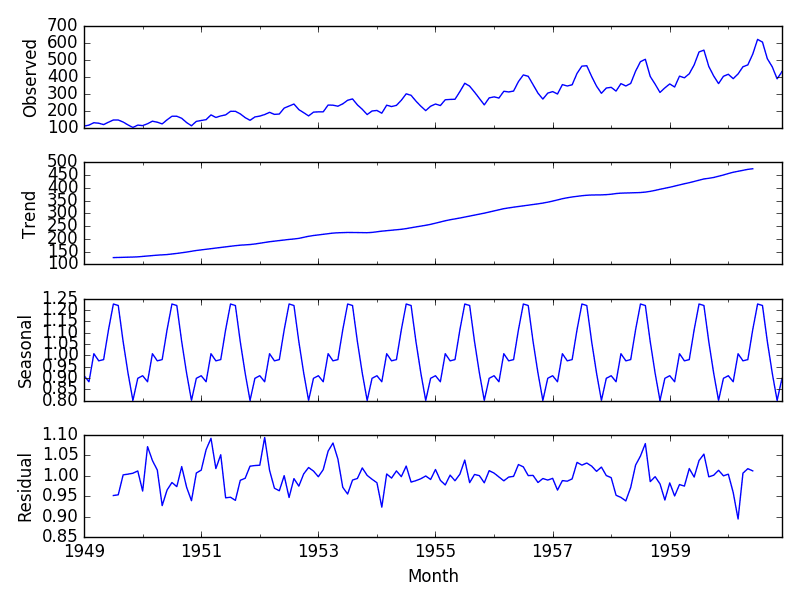

2. Análisis de correlación y/o independencia entre las variables

In [55]:
data_analysis = merged_data_new.copy()

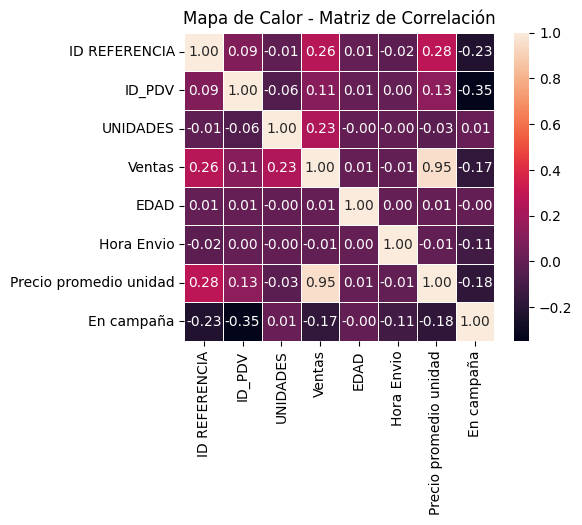

In [56]:
columnas_numericas = data_analysis.select_dtypes(include=['int64', 'float64'])

matriz_correlacion = columnas_numericas.corr()

plt.figure(figsize=(5, 4))

sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", linewidths=.5)

plt.title('Mapa de Calor - Matriz de Correlación')
plt.show()

3. Segmentación de clientes con técnicas de clustering

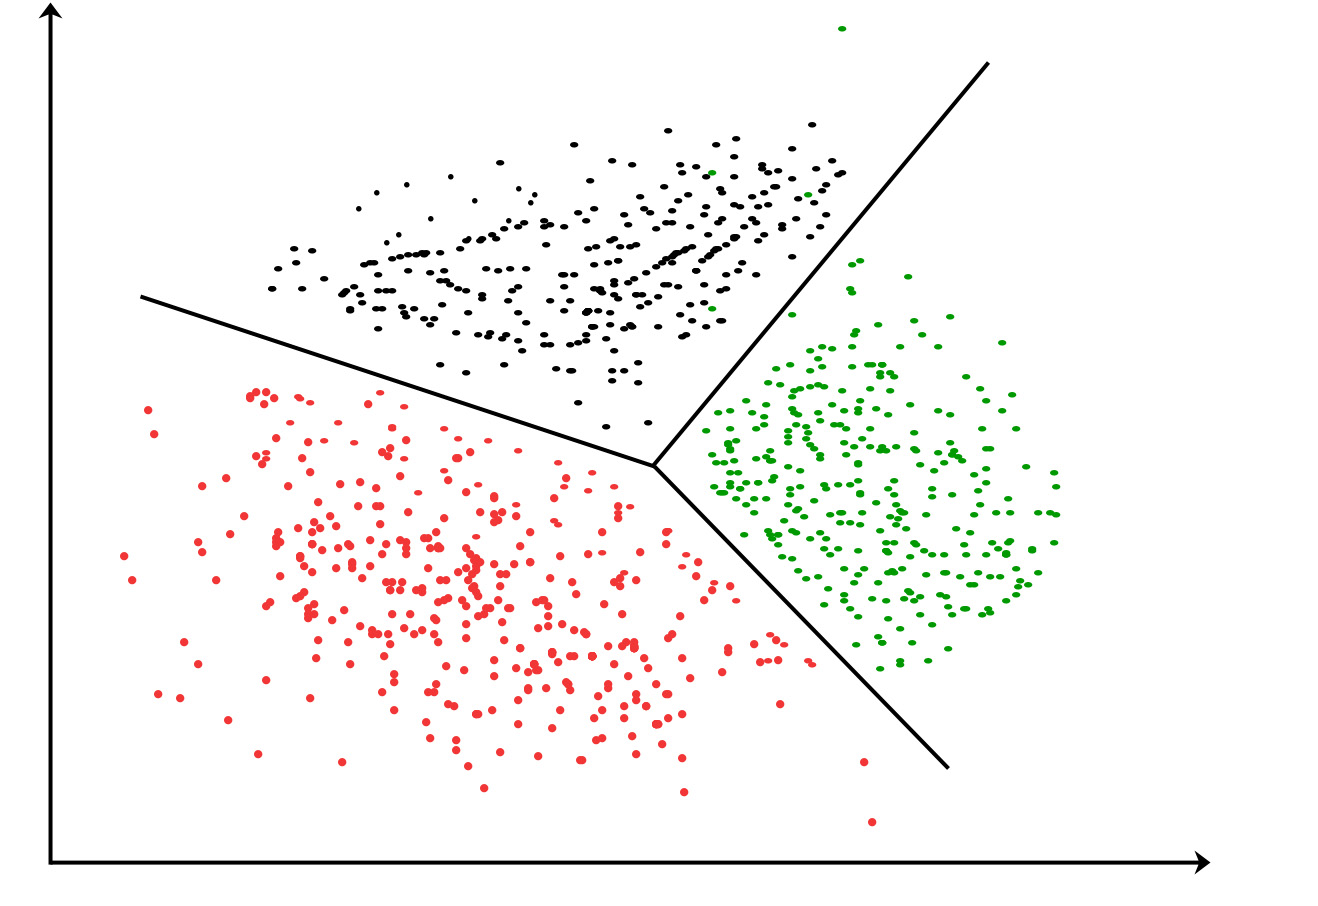

In [57]:
ruta_imagen_clu = 'k-means-copy.jpg'
display(Image(filename=ruta_imagen_clu, width=600, height=400))

3. Seguimiento con Google Analytics en el flujo de compra para las compras virtuales

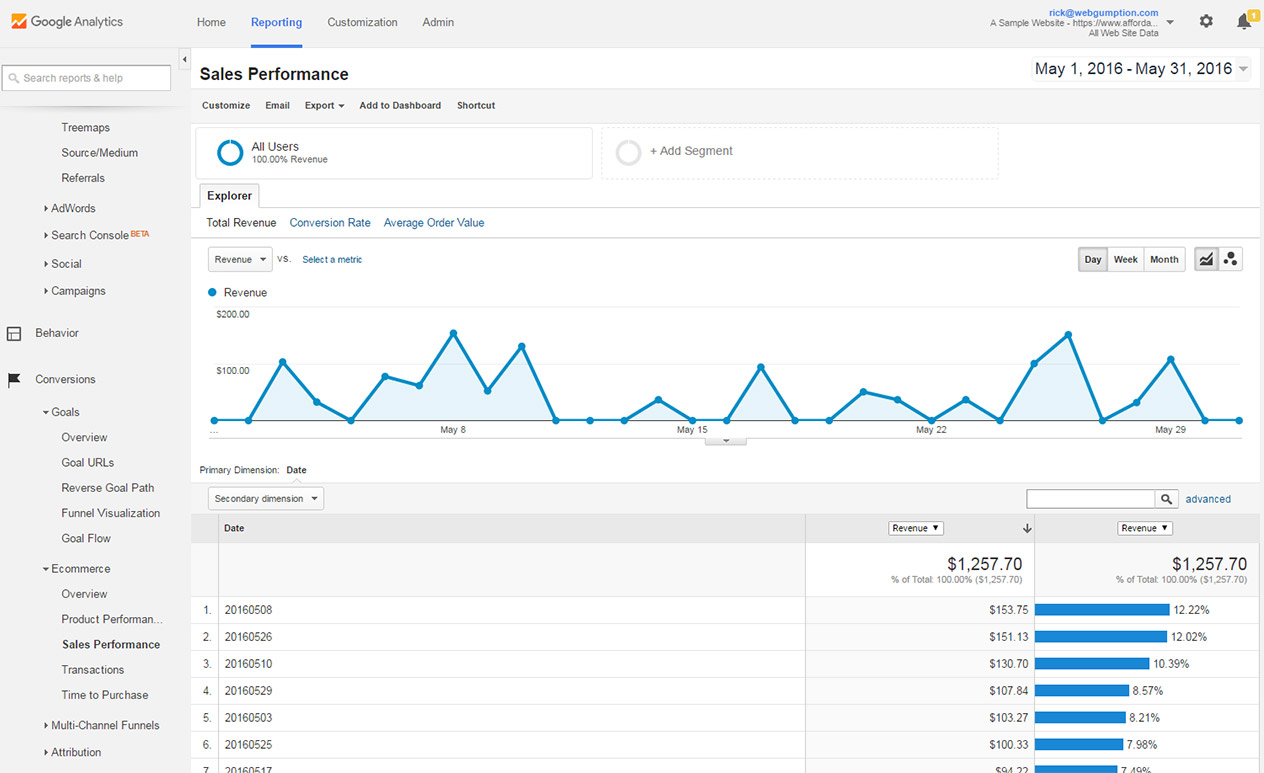

In [58]:
ruta_imagen = 'ecommerce-sales-performance.jpg'
display(Image(filename=ruta_imagen, width=600, height=400))

4. Si se tuviera información de ventas que no se concretaron, podrían aplicarse modelos predictivos para estimar si la venta se completaría o no, a partir de los datos conocidos sobre el cliente

- Ej: Regresión logística

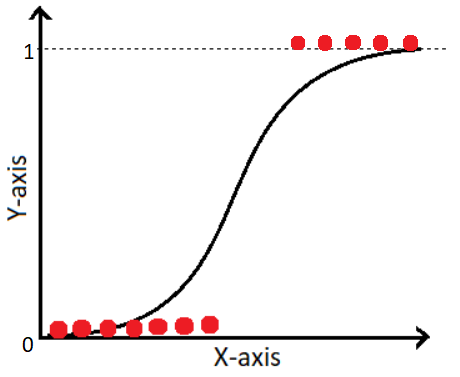

In [60]:
ruta_imagen_log = 'log.png'
display(Image(filename=ruta_imagen_log, width=400, height=400))

5. Modelos predictivos

Ej:
- ARIMA  Un modelo estadístico que utiliza información pasada para prever la demanda futura.
- Regresión lineal